# T4: DBSCAN聚类

**任务描述：** 利用DBSCAN算法计算数据的聚类。

**数据集：** 使用Make_blobs生成数据，不少于1000个data points，以3-5个cluster为宜。

**要求输出：**
1. 原始数据plot的图像和聚类后的结果
2. 尝试不少于三组ε、minPts的参数组合


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


## 1. 生成测试数据


数据形状: (1200, 2)
真实簇数: 4
每个簇的样本数:
  簇 0: 300 个样本
  簇 1: 300 个样本
  簇 2: 300 个样本
  簇 3: 300 个样本


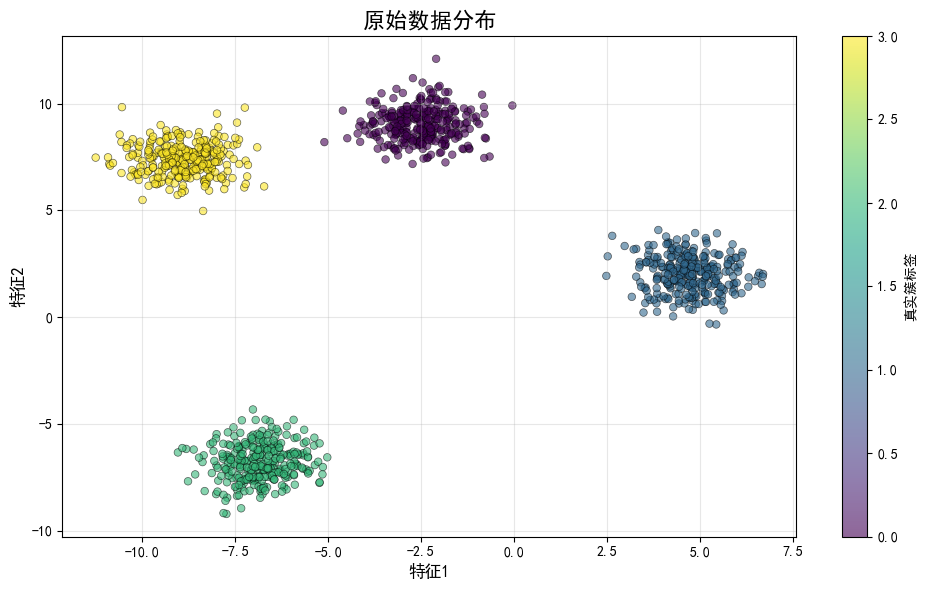

In [2]:
# 使用make_blobs生成数据
# 生成不少于1000个数据点，3-5个cluster
np.random.seed(42)

# 生成4个cluster的数据，总共1200个点
X, y_true = make_blobs(
    n_samples=1200,
    centers=4,
    n_features=2,
    cluster_std=0.8,
    random_state=42
)

print(f"数据形状: {X.shape}")
print(f"真实簇数: {len(np.unique(y_true))}")
print(f"每个簇的样本数:")
for i in range(len(np.unique(y_true))):
    print(f"  簇 {i}: {np.sum(y_true == i)} 个样本")

# 可视化原始数据
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6, s=30, edgecolors='black', linewidths=0.5)
plt.title('原始数据分布', fontsize=16)
plt.xlabel('特征1', fontsize=12)
plt.ylabel('特征2', fontsize=12)
plt.colorbar(label='真实簇标签')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2. 使用DBSCAN进行聚类（尝试不同的参数组合）


In [3]:
# 定义三组不同的参数组合
param_combinations = [
    {'eps': 0.3, 'min_samples': 5, 'name': '参数组合1: eps=0.3, min_samples=5'},
    {'eps': 0.5, 'min_samples': 10, 'name': '参数组合2: eps=0.5, min_samples=10'},
    {'eps': 0.7, 'min_samples': 15, 'name': '参数组合3: eps=0.7, min_samples=15'},
    {'eps': 0.4, 'min_samples': 8, 'name': '参数组合4: eps=0.4, min_samples=8'}  # 额外一组
]

# 存储所有结果
results = []

for params in param_combinations:
    eps = params['eps']
    min_samples = params['min_samples']
    name = params['name']
    
    # 应用DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # 统计结果
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    results.append({
        'name': name,
        'eps': eps,
        'min_samples': min_samples,
        'labels': labels,
        'n_clusters': n_clusters,
        'n_noise': n_noise
    })
    
    print(f"\n{name}:")
    print(f"  检测到的簇数: {n_clusters}")
    print(f"  噪声点数: {n_noise}")
    print(f"  聚类点数: {len(X) - n_noise}")



参数组合1: eps=0.3, min_samples=5:
  检测到的簇数: 11
  噪声点数: 117
  聚类点数: 1083

参数组合2: eps=0.5, min_samples=10:
  检测到的簇数: 4
  噪声点数: 65
  聚类点数: 1135

参数组合3: eps=0.7, min_samples=15:
  检测到的簇数: 4
  噪声点数: 21
  聚类点数: 1179

参数组合4: eps=0.4, min_samples=8:
  检测到的簇数: 4
  噪声点数: 119
  聚类点数: 1081


## 3. 可视化聚类结果


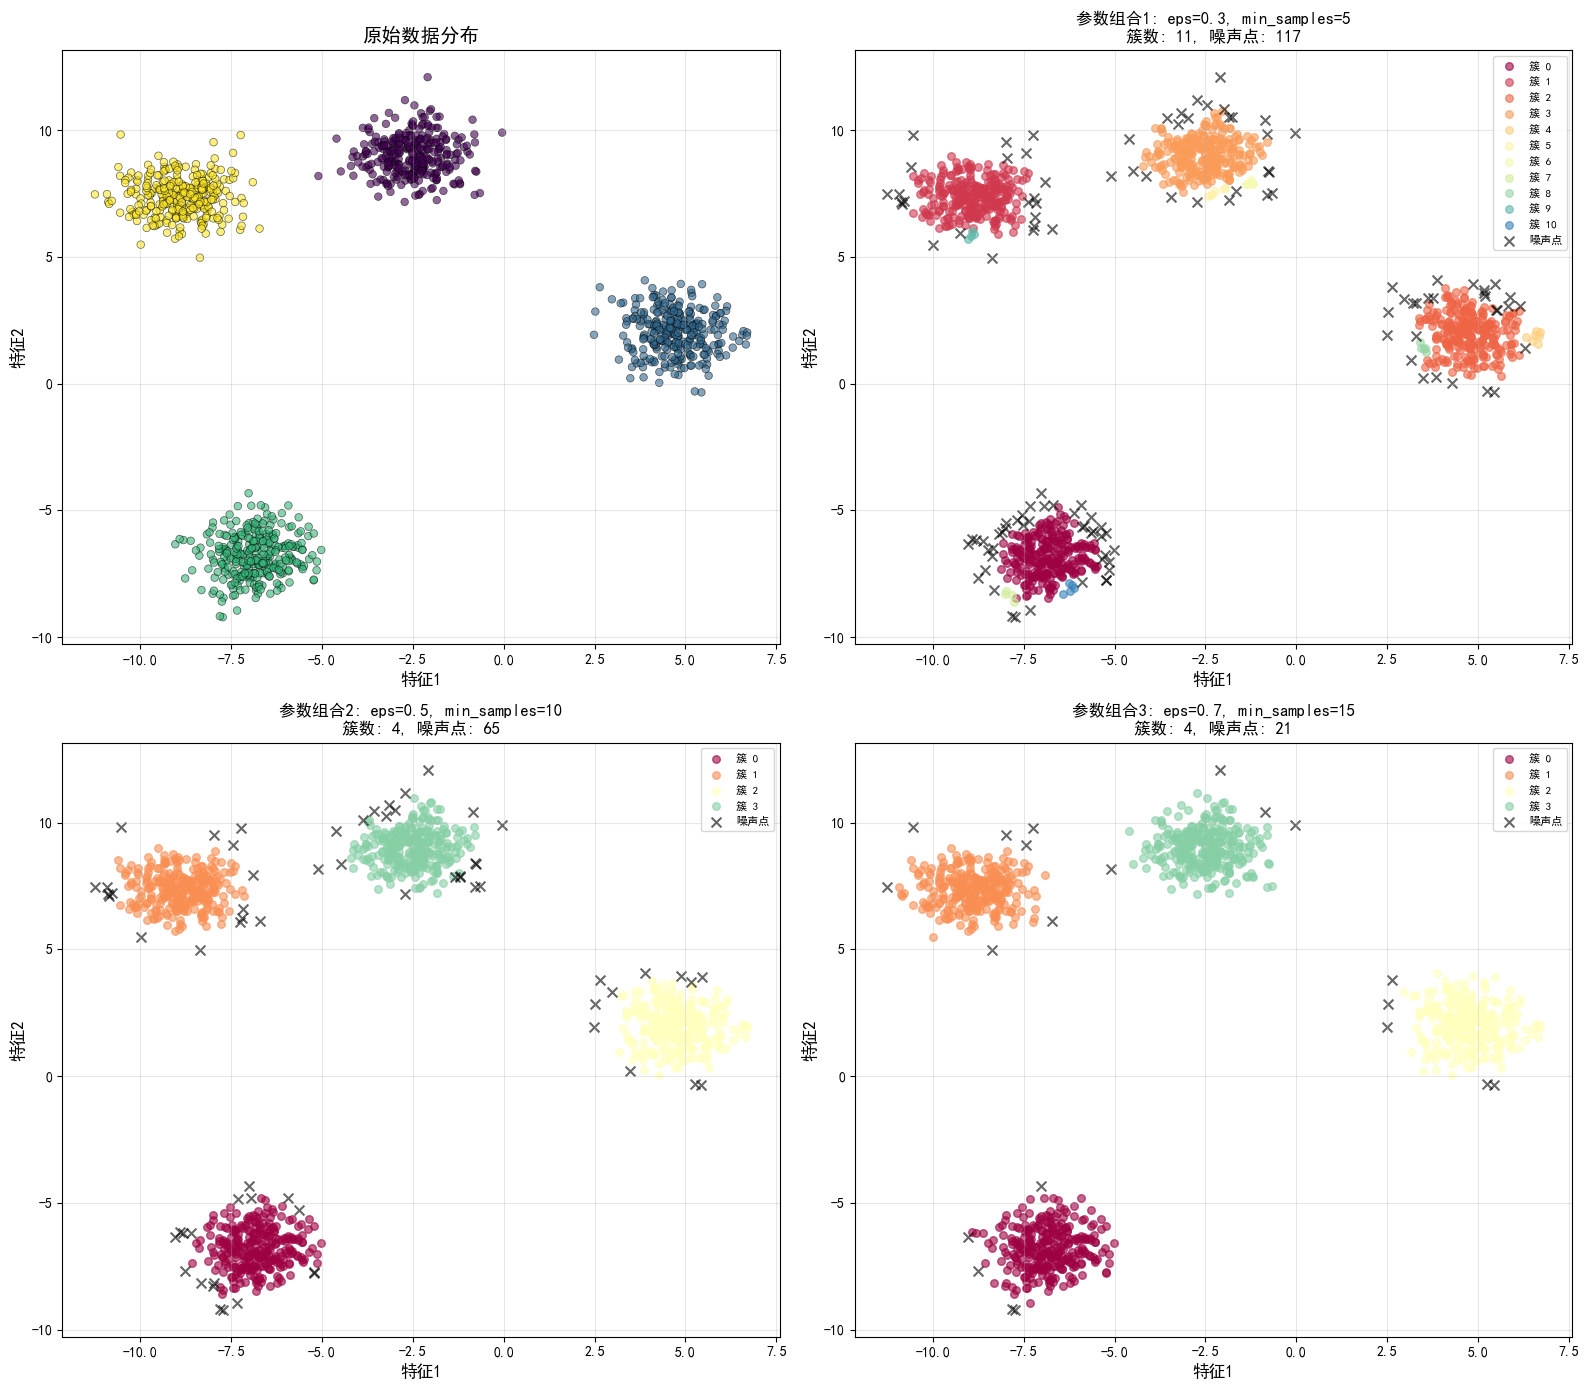

In [4]:
# 可视化所有参数组合的结果
n_combinations = len(results)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 首先显示原始数据
ax = axes[0, 0]
ax.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6, s=30, 
          edgecolors='black', linewidths=0.5)
ax.set_title('原始数据分布', fontsize=14)
ax.set_xlabel('特征1', fontsize=12)
ax.set_ylabel('特征2', fontsize=12)
ax.grid(True, alpha=0.3)

# 显示每个参数组合的聚类结果
for idx, result in enumerate(results):
    if idx == 0:
        ax = axes[0, 1]
    elif idx == 1:
        ax = axes[1, 0]
    elif idx == 2:
        ax = axes[1, 1]
    else:
        break
    
    labels = result['labels']
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # 噪声点用黑色表示
            col = 'black'
            marker = 'x'
            size = 50
        else:
            marker = 'o'
            size = 30
        
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, 
                  alpha=0.6, label=f'簇 {k}' if k != -1 else '噪声点')
    
    ax.set_title(f"{result['name']}\n簇数: {result['n_clusters']}, 噪声点: {result['n_noise']}", 
                fontsize=12)
    ax.set_xlabel('特征1', fontsize=12)
    ax.set_ylabel('特征2', fontsize=12)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. 详细对比不同参数组合的效果


参数组合对比:
                          参数组合  eps  min_samples  检测到的簇数  噪声点数  聚类点数
 参数组合1: eps=0.3, min_samples=5  0.3            5      11   117  1083
参数组合2: eps=0.5, min_samples=10  0.5           10       4    65  1135
参数组合3: eps=0.7, min_samples=15  0.7           15       4    21  1179
 参数组合4: eps=0.4, min_samples=8  0.4            8       4   119  1081


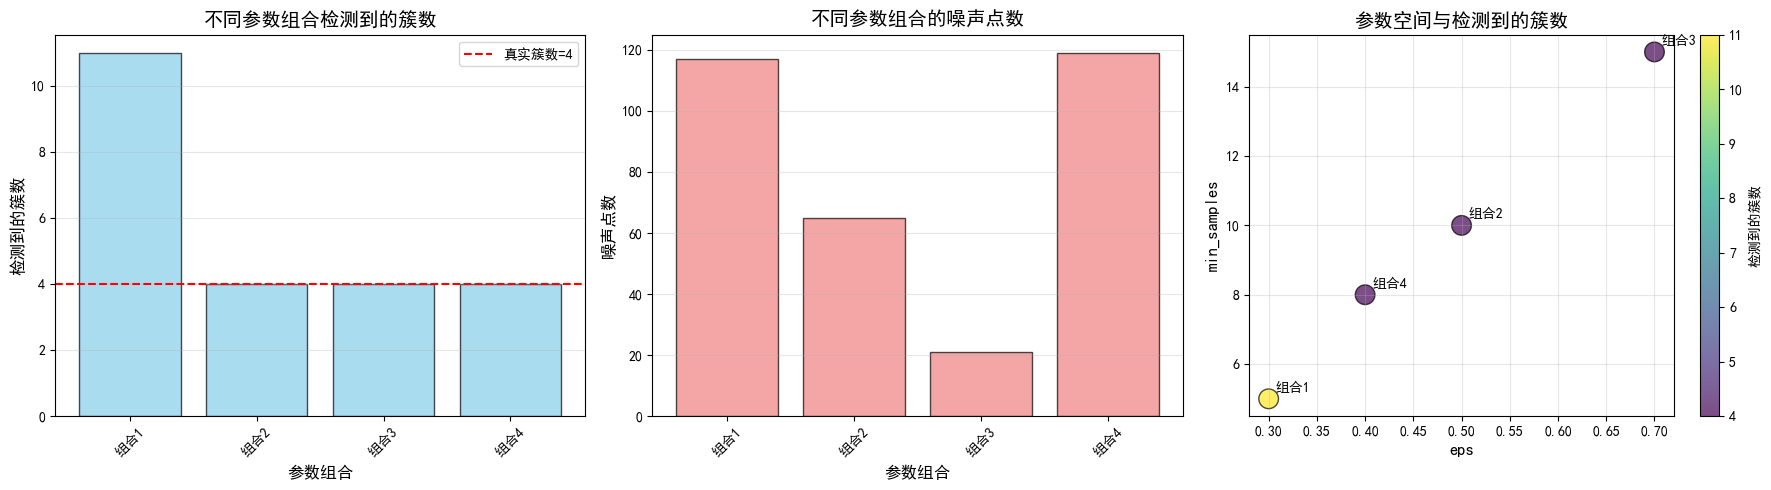

In [5]:
# 创建对比表格
comparison_data = []
for result in results:
    comparison_data.append({
        '参数组合': result['name'],
        'eps': result['eps'],
        'min_samples': result['min_samples'],
        '检测到的簇数': result['n_clusters'],
        '噪声点数': result['n_noise'],
        '聚类点数': len(X) - result['n_noise']
    })

comparison_df = pd.DataFrame(comparison_data)
print("参数组合对比:")
print(comparison_df.to_string(index=False))

# 可视化参数效果对比
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 簇数对比
axes[0].bar(range(len(results)), [r['n_clusters'] for r in results], 
           color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('参数组合', fontsize=12)
axes[0].set_ylabel('检测到的簇数', fontsize=12)
axes[0].set_title('不同参数组合检测到的簇数', fontsize=14)
axes[0].set_xticks(range(len(results)))
axes[0].set_xticklabels([f'组合{i+1}' for i in range(len(results))], rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axhline(y=4, color='r', linestyle='--', label='真实簇数=4')
axes[0].legend()

# 噪声点数对比
axes[1].bar(range(len(results)), [r['n_noise'] for r in results], 
           color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('参数组合', fontsize=12)
axes[1].set_ylabel('噪声点数', fontsize=12)
axes[1].set_title('不同参数组合的噪声点数', fontsize=14)
axes[1].set_xticks(range(len(results)))
axes[1].set_xticklabels([f'组合{i+1}' for i in range(len(results))], rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# eps vs min_samples 散点图（用簇数着色）
scatter = axes[2].scatter([r['eps'] for r in results], 
                         [r['min_samples'] for r in results],
                         c=[r['n_clusters'] for r in results], 
                         s=200, cmap='viridis', alpha=0.7, edgecolors='black')
axes[2].set_xlabel('eps', fontsize=12)
axes[2].set_ylabel('min_samples', fontsize=12)
axes[2].set_title('参数空间与检测到的簇数', fontsize=14)
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[2], label='检测到的簇数')

# 添加标签
for i, result in enumerate(results):
    axes[2].annotate(f'组合{i+1}', 
                    (result['eps'], result['min_samples']),
                    xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


## 5. 分析不同参数的影响


In [6]:
print("参数影响分析:")
print("=" * 60)
for result in results:
    print(f"\n{result['name']}:")
    print(f"  eps = {result['eps']}, min_samples = {result['min_samples']}")
    print(f"  结果: 检测到 {result['n_clusters']} 个簇，{result['n_noise']} 个噪声点")
    
    # 分析每个簇的大小
    labels = result['labels']
    cluster_sizes = {}
    for label in set(labels):
        if label != -1:
            cluster_sizes[label] = np.sum(labels == label)
    
    if cluster_sizes:
        print(f"  各簇大小: {cluster_sizes}")
    
    # 计算聚类质量指标
    if result['n_clusters'] > 0:
        cluster_ratio = (len(X) - result['n_noise']) / len(X)
        print(f"  聚类比例: {cluster_ratio:.2%}")

print("\n" + "=" * 60)
print("\n总结:")
print("- eps参数控制邻域半径，值越大，越容易形成更大的簇")
print("- min_samples参数控制形成核心点的最小样本数，值越大，对噪声越敏感")
print("- 需要根据数据特点选择合适的参数组合")


参数影响分析:

参数组合1: eps=0.3, min_samples=5:
  eps = 0.3, min_samples = 5
  结果: 检测到 11 个簇，117 个噪声点
  各簇大小: {0: 248, 1: 274, 2: 261, 3: 264, 4: 7, 5: 6, 6: 5, 7: 4, 8: 5, 9: 4, 10: 5}
  聚类比例: 90.25%

参数组合2: eps=0.5, min_samples=10:
  eps = 0.5, min_samples = 10
  结果: 检测到 4 个簇，65 个噪声点
  各簇大小: {0: 282, 1: 284, 2: 289, 3: 280}
  聚类比例: 94.58%

参数组合3: eps=0.7, min_samples=15:
  eps = 0.7, min_samples = 15
  结果: 检测到 4 个簇，21 个噪声点
  各簇大小: {0: 295, 1: 293, 2: 295, 3: 296}
  聚类比例: 98.25%

参数组合4: eps=0.4, min_samples=8:
  eps = 0.4, min_samples = 8
  结果: 检测到 4 个簇，119 个噪声点
  各簇大小: {0: 265, 1: 278, 2: 271, 3: 267}
  聚类比例: 90.08%


总结:
- eps参数控制邻域半径，值越大，越容易形成更大的簇
- min_samples参数控制形成核心点的最小样本数，值越大，对噪声越敏感
- 需要根据数据特点选择合适的参数组合


## 6. 总结

本实验完成了以下内容：
1. 使用make_blobs生成了1200个数据点，包含4个cluster
2. 实现了DBSCAN聚类算法
3. 尝试了4组不同的参数组合（eps和min_samples）
4. 可视化了原始数据和所有参数组合的聚类结果
5. 对比分析了不同参数对聚类效果的影响

**主要发现：**
- eps参数影响邻域大小，值越大越容易形成更大的簇
- min_samples参数影响对噪声的敏感度，值越大越容易将点标记为噪声
- 需要根据数据分布特点选择合适的参数组合
